In [42]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
foodconsumption_data = pd.read_csv('./2013_2014day1data.csv')
foodcode_data = pd.read_csv('./Foodcode_2013_2014.csv')
demographics_data = pd.read_csv('./Demographics_2013_2014.csv')

In [6]:
# change SEQN to an integer from a float - the float was causing some rounding errors on the counts yesterday

foodconsumption_data["SEQN"] = foodconsumption_data["SEQN"].apply(np.int64)
foodconsumption_data.head()

,SEQN,WTDRD1,WTDR2D,DR1ILINE,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,...,DR1IM181,DR1IM201,DR1IM221,DR1IP182,DR1IP183,DR1IP184,DR1IP204,DR1IP205,DR1IP225,DR1IP226
0,73563,31417.217100,40735.782420,2.0,4,54,1,2,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,73563,31417.217100,40735.782420,6.0,4,54,1,2,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,73627,3081.170095,2298.341202,1.0,4,49,1,2,21,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,73627,3081.170095,2298.341202,2.0,4,49,1,2,21,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,73627,3081.170095,2298.341202,3.0,4,49,1,2,21,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# pull out the three key fields from the food diary data set; change the column headers to something understandable
food_data_abridged = foodconsumption_data[["SEQN", "DR1IFDCD", "DR1IGRMS"]]
food_data_abridged.columns = ['PersonID', 'FoodCode', 'GramsEaten']
food_data_abridged.head()

,PersonID,FoodCode,GramsEaten
0,73563,11000000,0.0
1,73563,11000000,0.0
2,73627,11000000,0.0
3,73627,11000000,0.0
4,73627,11000000,0.0


In [8]:
demographics_data.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557.0,8.0,2.0,1.0,69.0,0,4,4,1,0,...,3,4,0,13281.237386,13481.042095,1,112,4,4,0.84
1,73558.0,8.0,2.0,1.0,54.0,0,3,3,1,0,...,3,1,1,23682.057386,24471.769625,1,108,7,7,1.78
2,73559.0,8.0,2.0,1.0,72.0,0,3,3,2,0,...,4,1,3,57214.803319,57193.285376,1,109,10,10,4.51
3,73560.0,8.0,2.0,1.0,9.0,0,3,3,1,119,...,3,1,4,55201.178592,55766.512438,2,109,9,9,2.52
4,73561.0,8.0,2.0,2.0,73.0,0,3,3,1,0,...,5,1,5,63709.667069,65541.871229,2,116,15,15,5.00


In [9]:
# change the SEQN type, gender, and age to int, as I did for the foodconsumption_data file
demographics_data["SEQN"] = demographics_data["SEQN"].apply(np.int64)
demographics_data["RIDAGEYR"] = demographics_data["RIDAGEYR"].apply(np.int64)
demographics_data["RIAGENDR"] = demographics_data["RIAGENDR"].apply(np.int64)
demographics_data.head()
# type(demographics_data)    # type = df

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8.0,2.0,1,69,0,4,4,1,0,...,3,4,0,13281.237386,13481.042095,1,112,4,4,0.84
1,73558,8.0,2.0,1,54,0,3,3,1,0,...,3,1,1,23682.057386,24471.769625,1,108,7,7,1.78
2,73559,8.0,2.0,1,72,0,3,3,2,0,...,4,1,3,57214.803319,57193.285376,1,109,10,10,4.51
3,73560,8.0,2.0,1,9,0,3,3,1,119,...,3,1,4,55201.178592,55766.512438,2,109,9,9,2.52
4,73561,8.0,2.0,2,73,0,3,3,1,0,...,5,1,5,63709.667069,65541.871229,2,116,15,15,5.00


In [10]:
demographics_data_abridged = demographics_data[["SEQN", "RIAGENDR", "RIDAGEYR"]]
demographics_data_abridged.columns = ['PersonID', 'Gender', 'Age']
demographics_data_abridged.head()

,PersonID,Gender,Age
0,73557,1,69
1,73558,1,54
2,73559,1,72
3,73560,1,9
4,73561,2,73


In [11]:
# replace the gender numbers (1, 2) with type (male, female)

def gender_type(gender_code):
    result = "Unknown"
    if (gender_code) == 1 :
        result = 'Male'
    elif (gender_code) == 2: 
        result = "Female"
    return result

demographics_data_abridged['GenderType'] = demographics_data_abridged['Gender'].apply(lambda x: gender_type(x))
# demographics_data_updated = demographics_data_abridged.Gender.apply[demographics_data_update]
demographics_data_abridged.head()
# demographics_data_updated

/Users/robertdiaz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PersonID,Gender,Age,GenderType
0,73557,1,69,Male
1,73558,1,54,Male
2,73559,1,72,Male
3,73560,1,9,Male
4,73561,2,73,Female


In [12]:
# add in age ranges for each age

def age_filter(age_cohort):
    result = '0 - 15'
    if (age_cohort < 16) :
        result = '0 - 15'
    elif (age_cohort <= 22) :
        result = '16 - 22'
    elif (age_cohort <= 29) :
        result = '23 - 29'
    elif (age_cohort <= 36) :
        result = '30 - 36'
    elif (age_cohort <= 43) :
        result = '37 - 43'
    elif (age_cohort <= 50) :
        result = '44 - 50'
    elif (age_cohort <= 57) :
        result = '51 - 57'
    elif (age_cohort <= 64) :
        result = '58 - 64'
    elif (age_cohort <= 71) :
        result = '65 - 71'
    elif (age_cohort <= 78) :
        result = '72 - 78'
    elif (79 <= age_cohort) :
        result = '79 + '
    return result

demographics_data_abridged['AgeRange'] = demographics_data_abridged['Age'].apply(lambda x: age_filter(x))
demographics_data_abridged.head()

/Users/robertdiaz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PersonID,Gender,Age,GenderType,AgeRange
0,73557,1,69,Male,65 - 71
1,73558,1,54,Male,51 - 57
2,73559,1,72,Male,72 - 78
3,73560,1,9,Male,0 - 15
4,73561,2,73,Female,72 - 78


In [13]:
# merging the demographics data with the food consumption data
# realized this merge gave me a filtered view which eliminated some of the macro level information about food consumption 
# generally: personfoodconsumed = pd.merge(demographics_data_abridged, food_data_filtered, how='inner', on='PersonID')
# re-running this to merge the abridged food consumption file, which is the original file (pre-four food filtering) +
# the new column header of PersonID in place of SEQN

# personfoodconsumed = pd.merge(demographics_data_abridged, food_data_filtered, how='inner', on='PersonID')
personfoodconsumed = pd.merge(demographics_data_abridged, food_data_abridged, how='inner', on='PersonID')
personfoodconsumed.head(n=10)
# personfoodconsumed.count()  # 131,544
# type(personfoodconsumed)

,PersonID,Gender,Age,GenderType,AgeRange,FoodCode,GramsEaten
0,73557,1,69,Male,65 - 71,27510690,173.50
1,73557,1,69,Male,65 - 71,32202075,84.00
2,73557,1,69,Male,65 - 71,61119010,131.00
3,73557,1,69,Male,65 - 71,61210250,449.50
4,73557,1,69,Male,65 - 71,63141140,220.50
5,73557,1,69,Male,65 - 71,71201050,8.50
6,73557,1,69,Male,65 - 71,91107000,2.00
7,73557,1,69,Male,65 - 71,91715100,42.75
8,73557,1,69,Male,65 - 71,92101000,359.10
9,73557,1,69,Male,65 - 71,92410310,620.00


In [14]:
# to get gender consumption averages, I need to know the counts of men and women (uniquely) who responded to the survey
# this is the macro level number of people, before filtering just on the four food categories
# personfoodconsumed.Gender.value_counts()
population_data = personfoodconsumed.groupby('GenderType')['PersonID'].nunique().reset_index()
population_data.columns = ['GenderType', 'PopulationCount']
population_data
# provides unique number of male and female respondents to the survey

,GenderType,PopulationCount
0,Female,4418
1,Male,4243
2,Unknown,1


In [15]:
# to get age range consumption averages, I need to know the counts of each age (uniquely) who responded to the survey
# this is the macro level number of people, before filtering just on the four food categories
# provides unique number of each age of respondents to the survey

# agerange_data = personfoodconsumed.groupby('Age')['PersonID'].nunique().reset_index()
# agerange_data.columns = ['Age', 'PopulationCount']
# agerange_data.head(n=10)
# agerange_data['PopulationCount'].sum()   #8662

agerange_data = personfoodconsumed.groupby('AgeRange')['PersonID'].nunique().reset_index()
agerange_data.columns = ['AgeRange', 'PopulationCount']
agerange_data

,AgeRange,PopulationCount
0,0 - 15,2983
1,16 - 22,908
2,23 - 29,578
3,30 - 36,637
4,37 - 43,625
5,44 - 50,617
6,51 - 57,602
7,58 - 64,606
8,65 - 71,492
9,72 - 78,319


In [16]:
# consolidating the four different filters into one to apply to the data set

def four_food_filter(item_code):
    result = False
    if ((10000000 <= item_code) and (item_code <= 19999999)) and (item_code not in range(11710000, 11740551)) :
        result = True
    elif ((21000100 <= item_code) and (item_code <= 21701020)) :
        result = True
    elif ((24100000 <= item_code) and (item_code <= 24198840)) :
        result = True
    elif ((75202000 <= item_code) and (item_code <= 75202036)) :
        result = True
    return result

# food_data_filter = food_data_abridged.groupby('Food Code').apply(four_food_filter)
food_data_filter = personfoodconsumed.FoodCode.apply(four_food_filter)
food_data_filtered = personfoodconsumed[food_data_filter]
food_data_filtered.head()
# food_data_filtered.count()  #19,447 rows that contain the four food categories


,PersonID,Gender,Age,GenderType,AgeRange,FoodCode,GramsEaten
11,73558,1,54,Male,51 - 57,11111000,152.50
12,73558,1,54,Male,51 - 57,11111000,366.00
19,73559,1,72,Male,72 - 78,11113000,183.00
20,73559,1,72,Male,72 - 78,14201010,210.00
46,73560,1,9,Male,0 - 15,11112210,167.75


In [17]:
# change the filter from food code types to food categories to make the sorting and comparisons easiers

def food_code_type(item_code):
    result = False
    if ((10000000 <= item_code) and (item_code <= 19999999)) and (item_code not in range(11710000, 11740551)) :
        result = 'DAIRY'
    elif ((21000100 <= item_code) and (item_code <= 21701020)) :
        result = 'BEEF'
    elif ((24100000 <= item_code) and (item_code <= 24198840)) :
        result = 'CHICKEN'
    elif ((75202000 <= item_code) and (item_code <= 75202036)) :
        result = 'ASPARAGUS'
    return result

food_data_filtered['FoodType'] = food_data_filtered['FoodCode'].apply(lambda x: food_code_type(x))
food_data_filtered.head()


/Users/robertdiaz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PersonID,Gender,Age,GenderType,AgeRange,FoodCode,GramsEaten,FoodType
11,73558,1,54,Male,51 - 57,11111000,152.50,DAIRY
12,73558,1,54,Male,51 - 57,11111000,366.00,DAIRY
19,73559,1,72,Male,72 - 78,11113000,183.00,DAIRY
20,73559,1,72,Male,72 - 78,14201010,210.00,DAIRY
46,73560,1,9,Male,0 - 15,11112210,167.75,DAIRY


In [18]:
food_data_filtered = food_data_filtered[['PersonID', 'GenderType', 'AgeRange', 'FoodType', 'GramsEaten']]
food_data_filtered.head()

,PersonID,GenderType,AgeRange,FoodType,GramsEaten
11,73558,Male,51 - 57,DAIRY,152.50
12,73558,Male,51 - 57,DAIRY,366.00
19,73559,Male,72 - 78,DAIRY,183.00
20,73559,Male,72 - 78,DAIRY,210.00
46,73560,Male,0 - 15,DAIRY,167.75


In [19]:
# create a new df to reflect the total amount of each food type consumed

foodcodegrouping = food_data_filtered.groupby("FoodType").apply(lambda x: x['GramsEaten'].sum())
foodcodegrouping = foodcodegrouping.to_frame()
foodcodegrouping.columns = ['FoodTypeSum']
foodcodegrouping

,FoodTypeSum
FoodType,
ASPARAGUS,6888.50
BEEF,135668.04
CHICKEN,254126.24
DAIRY,1914695.88


In [20]:
# create another column containing the number of unique people who ate each of the food categories

foodcodegrouping['PersonCount'] = food_data_filtered.groupby("FoodType").PersonID.nunique()
foodcodegrouping

,FoodTypeSum,PersonCount
FoodType,,
ASPARAGUS,6888.50,64
BEEF,135668.04,1259
CHICKEN,254126.24,2093
DAIRY,1914695.88,6806


In [21]:
# calculate the average of each type of food consumed, and create a new column with this information

foodcodegrouping['AvgTypeConsumed'] = foodcodegrouping['FoodTypeSum'] / 8662
foodcodegrouping

,FoodTypeSum,PersonCount,AvgTypeConsumed
FoodType,,,
ASPARAGUS,6888.50,64,0.795255
BEEF,135668.04,1259,15.662438
CHICKEN,254126.24,2093,29.338056
DAIRY,1914695.88,6806,221.045472


In [22]:
# create new df grouped by person ID and food type, then grams eaten
# provides the amount of food per food category consumed in a day by each person

food_data_filtered.head()
persongrouping = food_data_filtered.groupby(['PersonID','FoodType'])['GramsEaten'].sum().reset_index()
persongrouping.head()    

# persongrouping.PersonID.nunique().count()    # 7397

,PersonID,FoodType,GramsEaten
0,73558,DAIRY,518.50
1,73559,DAIRY,393.00
2,73560,BEEF,141.37
3,73560,DAIRY,535.08
4,73561,DAIRY,2.52


In [65]:
food_data_filtered.head()

,PersonID,GenderType,AgeRange,FoodType,GramsEaten
11,73558,Male,51 - 57,DAIRY,152.50
12,73558,Male,51 - 57,DAIRY,366.00
19,73559,Male,72 - 78,DAIRY,183.00
20,73559,Male,72 - 78,DAIRY,210.00
46,73560,Male,0 - 15,DAIRY,167.75


In [106]:
asparagus_dataframe = food_data_filtered[food_data_filtered.FoodType == "ASPARAGUS"]
asparagus_dataframe["Grams_Asparagus_Eaten"]= asparagus_dataframe["GramsEaten"]
asparagus_dataframe
asparagus_gender = asparagus_dataframe.groupby("GenderType").Grams_Asparagus_Eaten.sum().to_frame()
asparagus_gender
asparagus_age =  asparagus_dataframe.groupby("AgeRange").Grams_Asparagus_Eaten.sum().to_frame()
asparagus_age

/Users/robertdiaz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Grams_Asparagus_Eaten
AgeRange,
0 - 15,688.35
16 - 22,127.80
23 - 29,1054.85
30 - 36,341.80
37 - 43,774.15
44 - 50,631.78
51 - 57,967.65
58 - 64,961.97
65 - 71,593.00


In [107]:
dairy_dataframe = food_data_filtered[food_data_filtered.FoodType == "DAIRY"]
dairy_dataframe["Grams_Dairy_Eaten"]= dairy_dataframe["GramsEaten"]
dairy_dataframe
dairy_gender = dairy_dataframe.groupby("GenderType").Grams_Dairy_Eaten.sum().to_frame()
dairy_gender
dairy_age = dairy_dataframe.groupby("AgeRange").Grams_Dairy_Eaten.sum().to_frame()
dairy_age

/Users/robertdiaz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Grams_Dairy_Eaten
AgeRange,
0 - 15,851438.50
16 - 22,191580.70
23 - 29,101343.24
30 - 36,115012.99
37 - 43,108652.04
44 - 50,112712.32
51 - 57,104347.32
58 - 64,102399.01
65 - 71,87095.71


In [116]:
beef_dataframe = food_data_filtered[food_data_filtered.FoodType == "BEEF"]
beef_dataframe["Beef"]= beef_dataframe["GramsEaten"]
beef_dataframe
beef_gender = beef_dataframe.groupby("GenderType").Beef.sum().to_frame()
beef_gender
beef_age= beef_dataframe.groupby("AgeRange").Beef.sum().to_frame()
beef_age

/Users/robertdiaz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Beef
AgeRange,
0 - 15,26095.45
16 - 22,18725.93
23 - 29,15532.45
30 - 36,13804.27
37 - 43,13833.00
44 - 50,12720.21
51 - 57,10611.70
58 - 64,7793.85
65 - 71,8072.84


In [117]:
chicken_dataframe = food_data_filtered[food_data_filtered.FoodType == "CHICKEN"]
chicken_dataframe["Chicken"]= chicken_dataframe["GramsEaten"]
chicken_dataframe
chicken_gender = chicken_dataframe.groupby("GenderType").Chicken.sum().to_frame()
chicken_gender
chicken_age = chicken_dataframe.groupby("AgeRange").Chicken.sum().to_frame()
chicken_age

/Users/robertdiaz/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Chicken
AgeRange,
0 - 15,71941.81
16 - 22,36565.45
23 - 29,23818.57
30 - 36,23134.39
37 - 43,19302.96
44 - 50,16742.39
51 - 57,18591.48
58 - 64,17452.35
65 - 71,13556.76


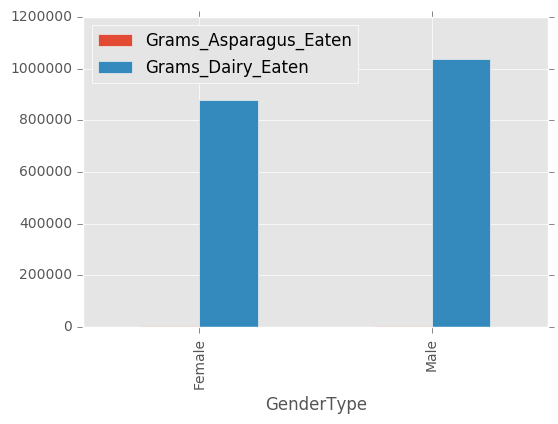

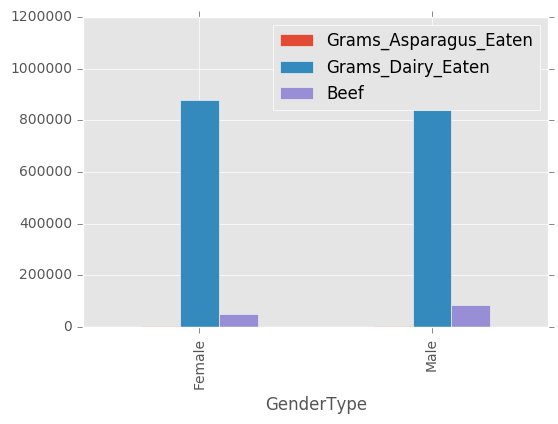

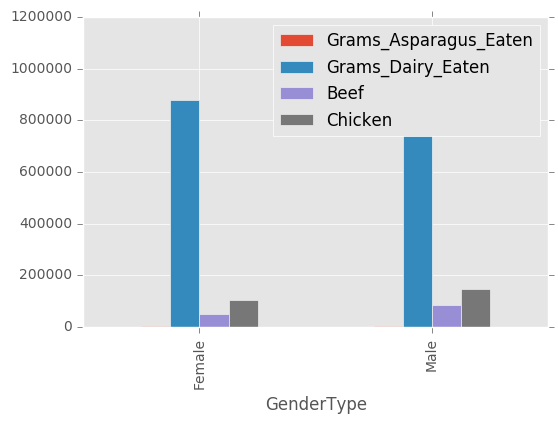

In [118]:
join_two_foods = pd.concat([asparagus_gender , dairy_gender], axis=1, join="inner")
join_two_foods
join_two_foods.plot(kind='bar')
join_three_foods = pd.concat([join_two_foods, beef_gender], axis=1, join="inner")
join_three_foods
join_three_foods.plot(kind='bar')
join_four_foods = pd.concat([join_three_foods, chicken_gender],axis=1, join="inner")
join_four_foods.plot(kind='bar')

,Grams_Asparagus_Eaten,Beef,Chicken,Grams_Dairy_Eaten
AgeRange,,,,
0 - 15,688.35,26095.45,71941.81,851438.50
16 - 22,127.80,18725.93,36565.45,191580.70
23 - 29,1054.85,15532.45,23818.57,101343.24
30 - 36,341.80,13804.27,23134.39,115012.99
37 - 43,774.15,13833.00,19302.96,108652.04
44 - 50,631.78,12720.21,16742.39,112712.32
51 - 57,967.65,10611.70,18591.48,104347.32
58 - 64,961.97,7793.85,17452.35,102399.01
65 - 71,593.00,8072.84,13556.76,87095.71


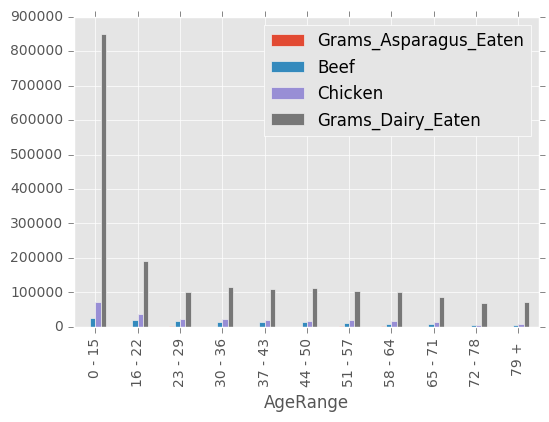

In [119]:
join_age1 = pd.concat([asparagus_age , beef_age], axis=1, join="inner")
join_age2 = pd.concat([join_age1 , chicken_age], axis=1, join="inner")
join_age3 = pd.concat([join_age2 , dairy_age], axis=1, join="inner")
join_age3.plot.bar()
join_age3

In [120]:
# group by gender and food type , sum the grams eaten 
groupbygenderfoodtype = food_data_filtered.groupby(['GenderType', 'FoodType'])['GramsEaten'].sum()
groupbygenderfoodtype

GenderType  FoodType 
Female      ASPARAGUS       3688.38
            BEEF           51243.92
            CHICKEN       105368.52
            DAIRY         879088.88
Male        ASPARAGUS       3200.12
            BEEF           84424.12
            CHICKEN       148757.72
            DAIRY        1035607.00
Name: GramsEaten, dtype: float64

In [24]:
# group by age range and food type , sum the grams eaten 
groupbyagerangefoodtype = food_data_filtered.groupby(['AgeRange', 'FoodType'])['GramsEaten'].sum()
groupbyagerangefoodtype

AgeRange  FoodType 
0 - 15    ASPARAGUS       688.35
          BEEF          26095.45
          CHICKEN       71941.81
          DAIRY        851438.50
16 - 22   ASPARAGUS       127.80
          BEEF          18725.93
          CHICKEN       36565.45
          DAIRY        191580.70
23 - 29   ASPARAGUS      1054.85
          BEEF          15532.45
          CHICKEN       23818.57
          DAIRY        101343.24
30 - 36   ASPARAGUS       341.80
          BEEF          13804.27
          CHICKEN       23134.39
          DAIRY        115012.99
37 - 43   ASPARAGUS       774.15
          BEEF          13833.00
          CHICKEN       19302.96
          DAIRY        108652.04
44 - 50   ASPARAGUS       631.78
          BEEF          12720.21
          CHICKEN       16742.39
          DAIRY        112712.32
51 - 57   ASPARAGUS       967.65
          BEEF          10611.70
          CHICKEN       18591.48
          DAIRY        104347.32
58 - 64   ASPARAGUS       961.97
          BEEF         

In [62]:
df1 = groupbygenderfoodtype.to_frame()
df1['RowType'] = df1['GramsEaten'].index
df1

GramsEaten              RowType
GenderType FoodType                                  
Female     ASPARAGUS     3688.38  (Female, ASPARAGUS)
           BEEF         51243.92       (Female, BEEF)
           CHICKEN     105368.52    (Female, CHICKEN)
           DAIRY       879088.88      (Female, DAIRY)
Male       ASPARAGUS     3200.12    (Male, ASPARAGUS)
           BEEF         84424.12         (Male, BEEF)
           CHICKEN     148757.72      (Male, CHICKEN)
           DAIRY      1035607.00        (Male, DAIRY)

In [26]:
df2 = groupbyagerangefoodtype.to_frame()
df2['RowType'] = df2['GramsEaten'].index
df2

GramsEaten               RowType
AgeRange FoodType                                   
0 - 15   ASPARAGUS      688.35   (0 - 15, ASPARAGUS)
         BEEF         26095.45        (0 - 15, BEEF)
         CHICKEN      71941.81     (0 - 15, CHICKEN)
         DAIRY       851438.50       (0 - 15, DAIRY)
16 - 22  ASPARAGUS      127.80  (16 - 22, ASPARAGUS)
         BEEF         18725.93       (16 - 22, BEEF)
         CHICKEN      36565.45    (16 - 22, CHICKEN)
         DAIRY       191580.70      (16 - 22, DAIRY)
23 - 29  ASPARAGUS     1054.85  (23 - 29, ASPARAGUS)
         BEEF         15532.45       (23 - 29, BEEF)
         CHICKEN      23818.57    (23 - 29, CHICKEN)
         DAIRY       101343.24      (23 - 29, DAIRY)
30 - 36  ASPARAGUS      341.80  (30 - 36, ASPARAGUS)
         BEEF         13804.27       (30 - 36, BEEF)
         CHICKEN      23134.39    (30 - 36, CHICKEN)
         DAIRY       115012.99      (30 - 36, DAIRY)
37 - 43  ASPARAGUS      774.15  (37 - 43, ASPARAGUS)
         BEEF         13833.00       (37 - 43, BEEF)
         CHICKEN      19302.96    (37 - 43, CHICKEN)
         DAIRY       108652.04      (37 - 43, DAIRY)
44 - 50  ASPARAGUS      631.78  (44 - 50, ASPARAGUS)
         BEEF         12720.21       (44 - 50, BEEF)
         CHICKEN      16742.39    (44 - 50, CHICKEN)
         DAIRY       112712.32      (44 - 50, DAIRY)
51 - 57  ASPARAGUS      967.65  (51 - 57, ASPARAGUS)
         BEEF         10611.70       (51 - 57, BEEF)
         CHICKEN      18591.48    (51 - 57, CHICKEN)
         DAIRY       104347.32      (51 - 57, DAIRY)
58 - 64  ASPARAGUS      961.97  (58 - 64, ASPARAGUS)
         BEEF          7793.85       (58 - 64, BEEF)
         CHICKEN      17452.35    (58 - 64, CHICKEN)
         DAIRY       102399.01      (58 - 64, DAIRY)
65 - 71  ASPARAGUS      593.00  (65 - 71, ASPARAGUS)
         BEEF          8072.84       (65 - 71, BEEF)
         CHICKEN      13556.76    (65 - 71, CHICKEN)
         DAIRY        87095.71      (65 - 71, DAIRY)
72 - 78  ASPARAGUS      279.25  (72 - 78, ASPARAGUS)
         BEEF          3957.36       (72 - 78, BEEF)
         CHICKEN       6192.44    (72 - 78, CHICKEN)
         DAIRY        67761.19      (72 - 78, DAIRY)
79 +     ASPARAGUS      467.90    (79 + , ASPARAGUS)
         BEEF          4520.98         (79 + , BEEF)
         CHICKEN       6827.64      (79 + , CHICKEN)
         DAIRY        72352.86        (79 + , DAIRY)

In [27]:
# adding in the number of total men and women to get the gender-specific averages
# quite a pain dealing with the multi-level indexing here, so created a workaround - RowType
# RowType is a tuple of the GenderType and FoodType; makes doing the calculations possible
# I clearly need to learn more about processing with multiple indices!!!

def gender_count(gender_type):
    if gender_type == 'Female': return 4418
    else: return 4243

# df1['TotalPeople'] = [4418]*4 + [4238]*4
df1['TotalPeople'] = df1['RowType'].apply(lambda x: gender_count(x[0]))

df1['AvgGrams'] = df1['GramsEaten'] / df1['TotalPeople']
df1

GramsEaten              RowType  TotalPeople    AvgGrams
GenderType FoodType                                                           
Female     ASPARAGUS     3688.38  (Female, ASPARAGUS)         4418    0.834853
           BEEF         51243.92       (Female, BEEF)         4418   11.598895
           CHICKEN     105368.52    (Female, CHICKEN)         4418   23.849823
           DAIRY       879088.88      (Female, DAIRY)         4418  198.978923
Male       ASPARAGUS     3200.12    (Male, ASPARAGUS)         4243    0.754212
           BEEF         84424.12         (Male, BEEF)         4243   19.897271
           CHICKEN     148757.72      (Male, CHICKEN)         4243   35.059562
           DAIRY      1035607.00        (Male, DAIRY)         4243  244.074240

In [28]:
# adding in the numbers within each age range to get the range-specific averages

def agerange_count(age_range):
    if age_range == '0 - 15': return 2983
    elif age_range == '16 - 22': return 908
    elif age_range == '23 - 29': return 578
    elif age_range == '30 - 36': return 637
    elif age_range == '37 - 43': return 625
    elif age_range == '44 - 50': return 617
    elif age_range == '51 - 57': return 602
    elif age_range == '58 - 64': return 606
    elif age_range == '65 - 71': return 492
    elif age_range == '72 - 78': return 319
    else: return 295

# df1['TotalPeople'] = [4418]*4 + [4238]*4
df2['TotalPeople'] = df2['RowType'].apply(lambda x: agerange_count(x[0]))

df2['AvgGrams'] = df2['GramsEaten'] / df2['TotalPeople']
df2

GramsEaten               RowType  TotalPeople    AvgGrams
AgeRange FoodType                                                            
0 - 15   ASPARAGUS      688.35   (0 - 15, ASPARAGUS)         2983    0.230758
         BEEF         26095.45        (0 - 15, BEEF)         2983    8.748056
         CHICKEN      71941.81     (0 - 15, CHICKEN)         2983   24.117268
         DAIRY       851438.50       (0 - 15, DAIRY)         2983  285.430272
16 - 22  ASPARAGUS      127.80  (16 - 22, ASPARAGUS)          908    0.140749
         BEEF         18725.93       (16 - 22, BEEF)          908   20.623271
         CHICKEN      36565.45    (16 - 22, CHICKEN)          908   40.270319
         DAIRY       191580.70      (16 - 22, DAIRY)          908  210.991960
23 - 29  ASPARAGUS     1054.85  (23 - 29, ASPARAGUS)          578    1.825000
         BEEF         15532.45       (23 - 29, BEEF)          578   26.872751
         CHICKEN      23818.57    (23 - 29, CHICKEN)          578   41.208599
         DAIRY       101343.24      (23 - 29, DAIRY)          578  175.334325
30 - 36  ASPARAGUS      341.80  (30 - 36, ASPARAGUS)          637    0.536578
         BEEF         13804.27       (30 - 36, BEEF)          637   21.670754
         CHICKEN      23134.39    (30 - 36, CHICKEN)          637   36.317724
         DAIRY       115012.99      (30 - 36, DAIRY)          637  180.554144
37 - 43  ASPARAGUS      774.15  (37 - 43, ASPARAGUS)          625    1.238640
         BEEF         13833.00       (37 - 43, BEEF)          625   22.132800
         CHICKEN      19302.96    (37 - 43, CHICKEN)          625   30.884736
         DAIRY       108652.04      (37 - 43, DAIRY)          625  173.843264
44 - 50  ASPARAGUS      631.78  (44 - 50, ASPARAGUS)          617    1.023955
         BEEF         12720.21       (44 - 50, BEEF)          617   20.616224
         CHICKEN      16742.39    (44 - 50, CHICKEN)          617   27.135154
         DAIRY       112712.32      (44 - 50, DAIRY)          617  182.677990
51 - 57  ASPARAGUS      967.65  (51 - 57, ASPARAGUS)          602    1.607392
         BEEF         10611.70       (51 - 57, BEEF)          602   17.627409
         CHICKEN      18591.48    (51 - 57, CHICKEN)          602   30.882857
         DAIRY       104347.32      (51 - 57, DAIRY)          602  173.334419
58 - 64  ASPARAGUS      961.97  (58 - 64, ASPARAGUS)          606    1.587409
         BEEF          7793.85       (58 - 64, BEEF)          606   12.861139
         CHICKEN      17452.35    (58 - 64, CHICKEN)          606   28.799257
         DAIRY       102399.01      (58 - 64, DAIRY)          606  168.975264
65 - 71  ASPARAGUS      593.00  (65 - 71, ASPARAGUS)          492    1.205285
         BEEF          8072.84       (65 - 71, BEEF)          492   16.408211
         CHICKEN      13556.76    (65 - 71, CHICKEN)          492   27.554390
         DAIRY        87095.71      (65 - 71, DAIRY)          492  177.023801
72 - 78  ASPARAGUS      279.25  (72 - 78, ASPARAGUS)          319    0.875392
         BEEF          3957.36       (72 - 78, BEEF)          319   12.405517
         CHICKEN       6192.44    (72 - 78, CHICKEN)          319   19.412038
         DAIRY        67761.19      (72 - 78, DAIRY)          319  212.417524
79 +     ASPARAGUS      467.90    (79 + , ASPARAGUS)          295    1.586102
         BEEF          4520.98         (79 + , BEEF)          295   15.325356
         CHICKEN       6827.64      (79 + , CHICKEN)          295   23.144542
         DAIRY        72352.86        (79 + , DAIRY)          295  245.263932

In [29]:
# creating a dictionary for the carbon footprint of our food categories to use for calculations
# Emissions Factor in (kg CO₂ eq/kg); source: Less Beef, Less Carbon, NRDC, March 2017
# https://www.nrdc.org/sites/default/files/less-beef-less-carbon-ip.pdf
# dairy isn't listed as a category, so I'm creating an average for dairy based on all the dairy listings in the above source

foodcarbonamt = {'ASPARAGUS': 8.87, 'BEEF': 26.45, 'CHICKEN': 5.05, 'DAIRY': 6.61}
print(foodcarbonamt)
foodcarbonamt['BEEF']

{'DAIRY': 6.61, 'BEEF': 26.45, 'CHICKEN': 5.05, 'ASPARAGUS': 8.87}


26.45

In [30]:
# calculate the carbon emissions for each food group
df1['AvgCO2perKg'] = (df1['AvgGrams'] * 1000) / df1['RowType'].apply(lambda x: foodcarbonamt[x[1]])
df1

GramsEaten              RowType  TotalPeople  \
GenderType FoodType                                                  
Female     ASPARAGUS     3688.38  (Female, ASPARAGUS)         4418   
           BEEF         51243.92       (Female, BEEF)         4418   
           CHICKEN     105368.52    (Female, CHICKEN)         4418   
           DAIRY       879088.88      (Female, DAIRY)         4418   
Male       ASPARAGUS     3200.12    (Male, ASPARAGUS)         4243   
           BEEF         84424.12         (Male, BEEF)         4243   
           CHICKEN     148757.72      (Male, CHICKEN)         4243   
           DAIRY      1035607.00        (Male, DAIRY)         4243   

                        AvgGrams   AvgCO2perKg  
GenderType FoodType                             
Female     ASPARAGUS    0.834853     94.120955  
           BEEF        11.598895    438.521566  
           CHICKEN     23.849823   4722.737317  
           DAIRY      198.978923  30102.711436  
Male       ASPARAGUS    0.754212     85.029497  
           BEEF        19.897271    752.259766  
           CHICKEN     35.059562   6942.487452  
           DAIRY      244.074240  36924.998476

In [32]:
# K: I changed the calculation a little for your calculation of the carbon emissions for each food group
df1['Average_Kg_CO2_per_Day'] = (df1['AvgGrams'] / 1000) * df1['RowType'].apply(lambda x: foodcarbonamt[x[1]])
df1

GramsEaten              RowType  TotalPeople  \
GenderType FoodType                                                  
Female     ASPARAGUS     3688.38  (Female, ASPARAGUS)         4418   
           BEEF         51243.92       (Female, BEEF)         4418   
           CHICKEN     105368.52    (Female, CHICKEN)         4418   
           DAIRY       879088.88      (Female, DAIRY)         4418   
Male       ASPARAGUS     3200.12    (Male, ASPARAGUS)         4243   
           BEEF         84424.12         (Male, BEEF)         4243   
           CHICKEN     148757.72      (Male, CHICKEN)         4243   
           DAIRY      1035607.00        (Male, DAIRY)         4243   

                        AvgGrams  AvgCO2perKg  Average_Kg_CO2_per_Day  
GenderType FoodType                                                    
Female     ASPARAGUS    0.834853     0.007405                0.007405  
           BEEF        11.598895     0.306791                0.306791  
           CHICKEN     23.849823     0.120442                0.120442  
           DAIRY      198.978923     1.315251                1.315251  
Male       ASPARAGUS    0.754212     0.006690                0.006690  
           BEEF        19.897271     0.526283                0.526283  
           CHICKEN     35.059562     0.177051                0.177051  
           DAIRY      244.074240     1.613331                1.613331

In [ ]:
# calculate the carbon emissions for each food group
df2['AvgCO2perKg'] = (df2['AvgGrams'] * 1000) / df2['RowType'].apply(lambda x: foodcarbonamt[x[1]])
df2

In [36]:
# K: I changed the calculation a little for your calculation of the carbon emissions for each food group
df2['Average_Kg_CO2_per_Day'] = (df2['AvgGrams'] / 1000) * df2['RowType'].apply(lambda x: foodcarbonamt[x[1]])
df2['Average_Kg_CO2_per_Year'] = df2['Average_Kg_CO2_per_Day'] * 365
df2

GramsEaten               RowType  TotalPeople    AvgGrams  \
AgeRange FoodType                                                               
0 - 15   ASPARAGUS      688.35   (0 - 15, ASPARAGUS)         2983    0.230758   
         BEEF         26095.45        (0 - 15, BEEF)         2983    8.748056   
         CHICKEN      71941.81     (0 - 15, CHICKEN)         2983   24.117268   
         DAIRY       851438.50       (0 - 15, DAIRY)         2983  285.430272   
16 - 22  ASPARAGUS      127.80  (16 - 22, ASPARAGUS)          908    0.140749   
         BEEF         18725.93       (16 - 22, BEEF)          908   20.623271   
         CHICKEN      36565.45    (16 - 22, CHICKEN)          908   40.270319   
         DAIRY       191580.70      (16 - 22, DAIRY)          908  210.991960   
23 - 29  ASPARAGUS     1054.85  (23 - 29, ASPARAGUS)          578    1.825000   
         BEEF         15532.45       (23 - 29, BEEF)          578   26.872751   
         CHICKEN      23818.57    (23 - 29, CHICKEN)          578   41.208599   
         DAIRY       101343.24      (23 - 29, DAIRY)          578  175.334325   
30 - 36  ASPARAGUS      341.80  (30 - 36, ASPARAGUS)          637    0.536578   
         BEEF         13804.27       (30 - 36, BEEF)          637   21.670754   
         CHICKEN      23134.39    (30 - 36, CHICKEN)          637   36.317724   
         DAIRY       115012.99      (30 - 36, DAIRY)          637  180.554144   
37 - 43  ASPARAGUS      774.15  (37 - 43, ASPARAGUS)          625    1.238640   
         BEEF         13833.00       (37 - 43, BEEF)          625   22.132800   
         CHICKEN      19302.96    (37 - 43, CHICKEN)          625   30.884736   
         DAIRY       108652.04      (37 - 43, DAIRY)          625  173.843264   
44 - 50  ASPARAGUS      631.78  (44 - 50, ASPARAGUS)          617    1.023955   
         BEEF         12720.21       (44 - 50, BEEF)          617   20.616224   
         CHICKEN      16742.39    (44 - 50, CHICKEN)          617   27.135154   
         DAIRY       112712.32      (44 - 50, DAIRY)          617  182.677990   
51 - 57  ASPARAGUS      967.65  (51 - 57, ASPARAGUS)          602    1.607392   
         BEEF         10611.70       (51 - 57, BEEF)          602   17.627409   
         CHICKEN      18591.48    (51 - 57, CHICKEN)          602   30.882857   
         DAIRY       104347.32      (51 - 57, DAIRY)          602  173.334419   
58 - 64  ASPARAGUS      961.97  (58 - 64, ASPARAGUS)          606    1.587409   
         BEEF          7793.85       (58 - 64, BEEF)          606   12.861139   
         CHICKEN      17452.35    (58 - 64, CHICKEN)          606   28.799257   
         DAIRY       102399.01      (58 - 64, DAIRY)          606  168.975264   
65 - 71  ASPARAGUS      593.00  (65 - 71, ASPARAGUS)          492    1.205285   
         BEEF          8072.84       (65 - 71, BEEF)          492   16.408211   
         CHICKEN      13556.76    (65 - 71, CHICKEN)          492   27.554390   
         DAIRY        87095.71      (65 - 71, DAIRY)          492  177.023801   
72 - 78  ASPARAGUS      279.25  (72 - 78, ASPARAGUS)          319    0.875392   
         BEEF          3957.36       (72 - 78, BEEF)          319   12.405517   
         CHICKEN       6192.44    (72 - 78, CHICKEN)          319   19.412038   
         DAIRY        67761.19      (72 - 78, DAIRY)          319  212.417524   
79 +     ASPARAGUS      467.90    (79 + , ASPARAGUS)          295    1.586102   
         BEEF          4520.98         (79 + , BEEF)          295   15.325356   
         CHICKEN       6827.64      (79 + , CHICKEN)          295   23.144542   
         DAIRY        72352.86        (79 + , DAIRY)          295  245.263932   

                    AvgCO2perKg  Average_Kg_CO2_per_Day  \
AgeRange FoodType                                         
0 - 15   ASPARAGUS     0.002047                0.002047   
         BEEF          0.231386                0.231386   
         CHICKEN       0.121792                0.121792  

In [58]:
#pivoted_df2 = df2.pivot(index="AgeRange", columns="FoodType", values="Average_KgCO2_per_Year")

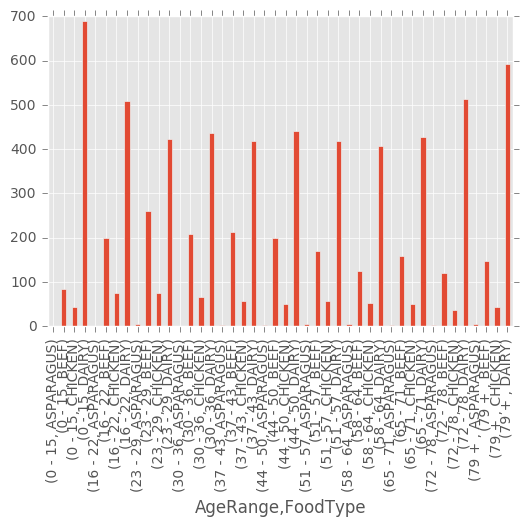

In [49]:
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
#df2.plot(y= "Average_Kg_CO2_per_Year", kind = 'bar')
df2.Average_Kg_CO2_per_Year.plot.bar()

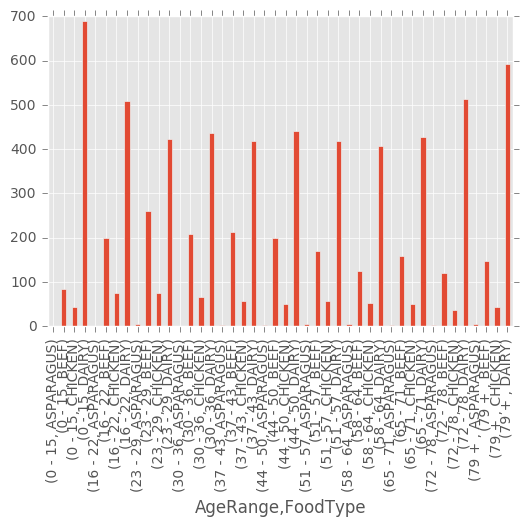

In [56]:
df2.Average_Kg_CO2_per_Year.plot.bar()

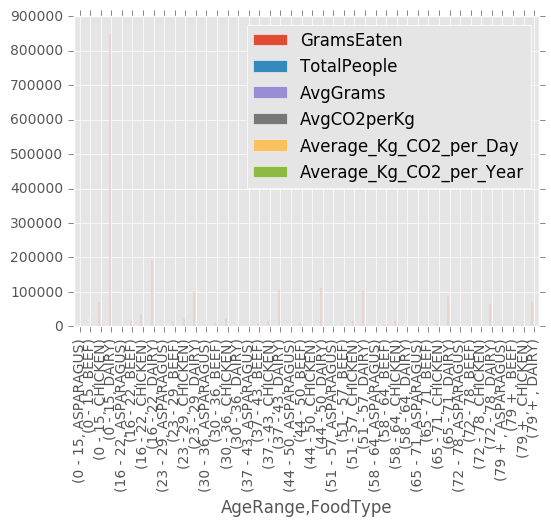

In [51]:
df2.plot(kind = 'bar')

In [123]:
df3 = df2["Average_Kg_CO2_per_Year"].to_frame()
df3

Average_Kg_CO2_per_Year
AgeRange FoodType                          
0 - 15   ASPARAGUS                 0.747089
         BEEF                     84.455916
         CHICKEN                  44.454154
         DAIRY                   688.643345
16 - 22  ASPARAGUS                 0.455682
         BEEF                    199.102213
         CHICKEN                  74.228266
         DAIRY                   509.049753
23 - 29  ASPARAGUS                 5.908529
         BEEF                    259.436255
         CHICKEN                  75.957749
         DAIRY                   423.020360
30 - 36  ASPARAGUS                 1.737197
         BEEF                    209.214872
         CHICKEN                  66.942644
         DAIRY                   435.613957
37 - 43  ASPARAGUS                 4.010159
         BEEF                    213.675584
         CHICKEN                  56.928290
         DAIRY                   419.422951
44 - 50  ASPARAGUS                 3.315104
         BEEF                    199.034177
         CHICKEN                  50.016873
         DAIRY                   440.738053
51 - 57  ASPARAGUS                 5.204012
         BEEF                    170.179410
         CHICKEN                  56.924826
         DAIRY                   418.195285
58 - 64  ASPARAGUS                 5.139317
         BEEF                    124.164647
         CHICKEN                  53.084231
         DAIRY                   407.678171
65 - 71  ASPARAGUS                 3.902169
         BEEF                    158.408975
         CHICKEN                  50.789630
         DAIRY                   427.096473
72 - 78  ASPARAGUS                 2.834125
         BEEF                    119.765965
         CHICKEN                  35.781238
         DAIRY                   512.489138
79 +     ASPARAGUS                 5.135084
         BEEF                    147.954818
         CHICKEN                  42.661178
         DAIRY                   591.736026

In [128]:
df3_unstack = df3.unstack(level=-1)
df3_unstack

Average_Kg_CO2_per_Year                                   
FoodType               ASPARAGUS        BEEF    CHICKEN       DAIRY
AgeRange                                                           
0 - 15                  0.747089   84.455916  44.454154  688.643345
16 - 22                 0.455682  199.102213  74.228266  509.049753
23 - 29                 5.908529  259.436255  75.957749  423.020360
30 - 36                 1.737197  209.214872  66.942644  435.613957
37 - 43                 4.010159  213.675584  56.928290  419.422951
44 - 50                 3.315104  199.034177  50.016873  440.738053
51 - 57                 5.204012  170.179410  56.924826  418.195285
58 - 64                 5.139317  124.164647  53.084231  407.678171
65 - 71                 3.902169  158.408975  50.789630  427.096473
72 - 78                 2.834125  119.765965  35.781238  512.489138
79 +                    5.135084  147.954818  42.661178  591.736026

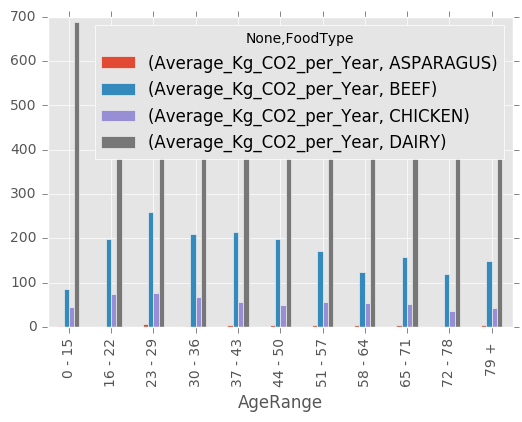

In [137]:
df3_unstack.plot.bar()

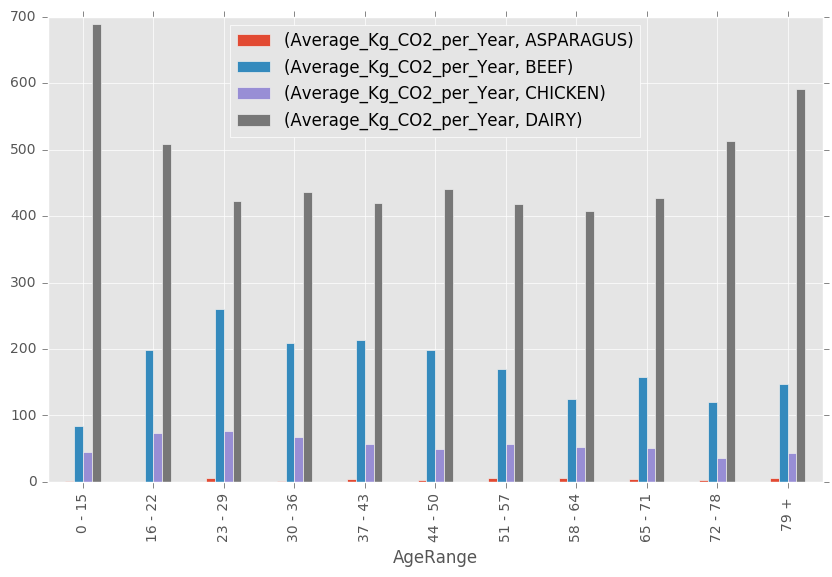

In [157]:
fig, ax = plt.subplots(figsize=(10,6))
ax = df3_unstack.plot.bar(ax=ax)
ax.legend(loc=9, fontsize=12)

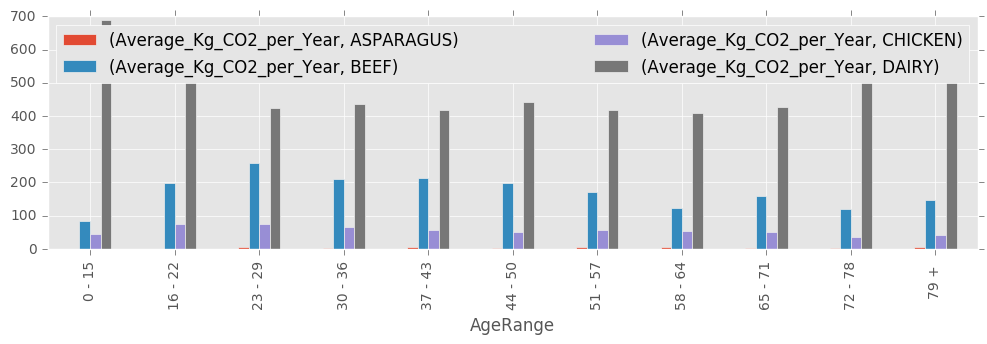

In [151]:
fig, ax = plt.subplots(figsize=(12,3))
ax = df3_unstack.plot.bar(ax=ax)
ax.legend(loc=9, mode='expand', ncol=2)

In [ ]:
#about to try joining in the driving data
df4 = pd.concat(df3_unstack, 